<a href="https://colab.research.google.com/github/Sepaszoee/Retail/blob/main/Portfolio_Advanced_Retail_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Advanced Online Retail Data Analysis with ML Forecasting
**Author:** Zohre  
**GitHub:** [github.com/Sepaszoee](https://github.com/Sepaszoee)

This notebook demonstrates a real-world data analysis and forecasting pipeline using the [Online Retail dataset](https://archive.ics.uci.edu/ml/datasets/online+retail).

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn openpyxl

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
sns.set(style='whitegrid')

## 📥 Load Dataset

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(url)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 🧹 Data Cleaning

In [3]:
df.dropna(inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Total'] = df['Quantity'] * df['UnitPrice']
df['Month'] = df['InvoiceDate'].dt.to_period('M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


## 🌍 Top 10 Countries by Revenue (Excl. UK)

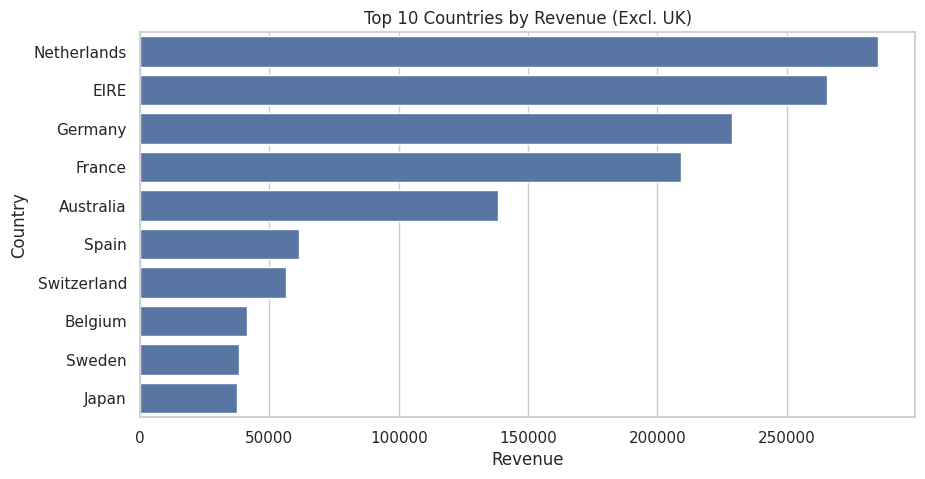

In [4]:
top_countries = df.groupby('Country')['Total'].sum().sort_values(ascending=False)
top_countries = top_countries.drop('United Kingdom').head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Revenue (Excl. UK)')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.show()

## 📈 Monthly Sales Trend

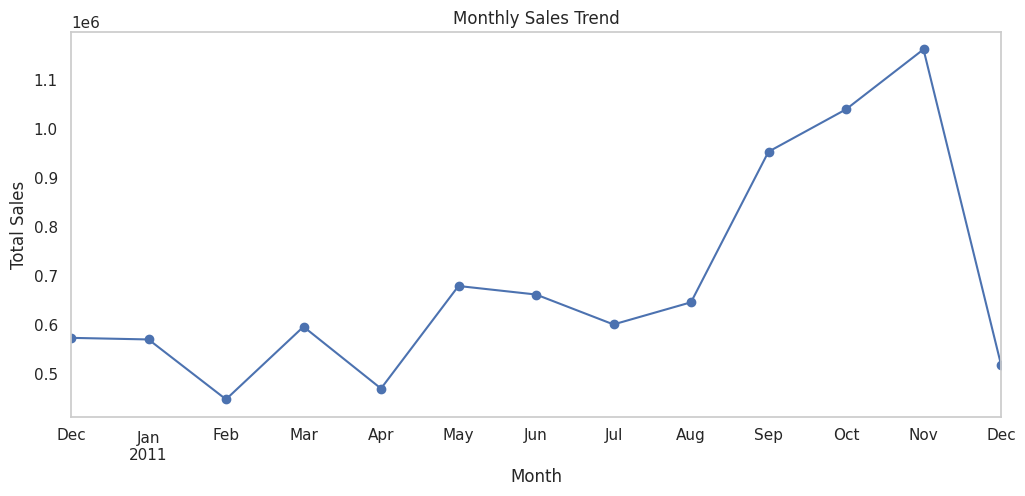

In [5]:
monthly_sales = df.groupby('Month')['Total'].sum().to_timestamp()
plt.figure(figsize=(12,5))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

## 🔮 Forecasting with Linear Regression

In [6]:
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df['MonthNum'] = range(len(monthly_sales_df))
X = monthly_sales_df[['MonthNum']]
y = monthly_sales_df['Total']
model = LinearRegression()
model.fit(X, y)
future_month = [[len(monthly_sales_df)]]
prediction = model.predict(future_month)
print(f'📈 Predicted sales for next month: ${prediction[0]:,.2f}')

📈 Predicted sales for next month: $929,695.12


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## ✅ Conclusion
- Most revenue came from **Netherlands, Germany, and France**.
- Strong seasonal trends observed — peaks during **November**.
- Forecasting using simple regression provides a base for future ML enhancements.